In [1]:
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
from ultralytics import YOLO
import glob
import xml.etree.ElementTree as ET

In [3]:
dog_aliases = {'Abrador', 'Chihuahua', 'Shiba-Inu'}

base_dir = '../data' 

for split in ['train', 'valid', 'test']:
    split_dir = os.path.join(base_dir, split)
    if not os.path.isdir(split_dir):
        continue

    xml_paths = glob.glob(os.path.join(split_dir, '*.xml'))
    for xml_path in xml_paths:
        tree = ET.parse(xml_path)
        root = tree.getroot()
        modified = False

        for obj in root.findall('object'):
            name_elem = obj.find('name')
            if name_elem is not None and name_elem.text in dog_aliases:
                name_elem.text = 'dog'
                modified = True

        if modified:
            tree.write(xml_path, encoding='utf-8', xml_declaration=True)
            print(f"Updated: {xml_path}")

Updated: data/train/2Q-1-_jpg.rf.13411f4537bc571689b86a4cdce2f4ae.xml
Updated: data/train/2Q-1-_jpg.rf.20077eb39b1d18e36687fd8ca36048a0.xml
Updated: data/train/2Q-1-_jpg.rf.62136b4446a89e77ff17dfbd36b098ee.xml
Updated: data/train/2Q-1-_jpg.rf.73dfe7ec356cd543ff2bc23621606517.xml
Updated: data/train/2Q-1-_jpg.rf.9322dadcad5acf3dd2a5c600fcc95f4d.xml
Updated: data/train/2Q-1-_jpg.rf.d3742a6ceb097c3c4eadd9cbc0947915.xml
Updated: data/train/2Q-10-_jpg.rf.3f7a3b7f3682659f5869e43c809f3dc1.xml
Updated: data/train/2Q-10-_jpg.rf.911657af5cb48c3e94bc9183286ec0f1.xml
Updated: data/train/2Q-10-_jpg.rf.9306f56dadd28d7d4c219d2632392138.xml
Updated: data/train/2Q-10-_jpg.rf.a741bb5669a15aa55fcdaf93dbd24bca.xml
Updated: data/train/2Q-10-_jpg.rf.e75b399f70b3fe4a2137398986677006.xml
Updated: data/train/2Q-10-_jpg.rf.f07157821ad3b44c49b13fc1e2c93136.xml
Updated: data/train/2Q-11-_jpg.rf.21c2c4bd6a08d2552c89010a9fb8bafd.xml
Updated: data/train/2Q-11-_jpg.rf.862b01f7a31717f42b9c5e4f152563d4.xml
Updated: dat

In [4]:
model = YOLO('yolov5n.pt')

model.info()

PRO TIP 💡 Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 5.31M/5.31M [00:00<00:00, 231MB/s]


YOLOv5n summary: 153 layers, 2,654,816 parameters, 0 gradients, 7.8 GFLOPs


(153, 2654816, 0, 7.840102399999999)

In [ ]:
model.train(
    data='../data_small/dog.yaml',
    imgsz=640,
    epochs=20,
    batch=16,
    project='runs',
    name='baseline',
    exist_ok=True
)

Ultralytics 8.3.134 🚀 Python-3.10.10 torch-2.7.0+cu128 CPU (Intel Xeon Platinum 8259CL 2.50GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data_small/dog.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov5n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=baseline, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretr

  8                  -1  1    296448  ultralytics.nn.modules.block.C3              [256, 256, 1]                 
  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 
 10                  -1  1     33024  ultralytics.nn.modules.conv.Conv             [256, 128, 1, 1]              
 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 13                  -1  1     90880  ultralytics.nn.modules.block.C3              [256, 128, 1, False]          
 14                  -1  1      8320  ultralytics.nn.modules.conv.Conv             [128, 64, 1, 1]               
 15                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 16             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

train: Scanning /teamspace/studios/this_studio/dlbs-mc-oliver-fabian/data_small/train... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<00:00, 841.35it/s]

train: New cache created: /teamspace/studios/this_studio/dlbs-mc-oliver-fabian/data_small/train.cache
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 413.6±71.9 MB/s, size: 376.6 KB)



/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Scanning /teamspace/studios/this_studio/dlbs-mc-oliver-fabian/data_small/valid... 50 images, 1 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 945.74it/s]


val: New cache created: /teamspace/studios/this_studio/dlbs-mc-oliver-fabian/data_small/valid.cache


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Plotting labels to runs/baseline/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/baseline
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.351      3.888      1.612          9        640: 100%|██████████| 7/7 [00:35<00:00,  5.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.41s/it]

                   all         50         54     0.0115      0.887      0.101     0.0586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      1.081      3.407      1.452         10        640: 100%|██████████| 7/7 [00:32<00:00,  4.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.19s/it]

                   all         50         54     0.0273      0.934       0.29      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      1.123      2.657      1.466         14        640: 100%|██████████| 7/7 [00:31<00:00,  4.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.41s/it]

                   all         50         54      0.022      0.943      0.357       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      1.164      2.401      1.453          8        640: 100%|██████████| 7/7 [00:33<00:00,  4.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.71s/it]

                   all         50         54      0.932       0.12      0.338      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G       1.19      2.225      1.521          6        640: 100%|██████████| 7/7 [00:34<00:00,  4.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.69s/it]

                   all         50         54      0.916      0.179      0.359      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      1.056      2.149      1.435          5        640: 100%|██████████| 7/7 [00:35<00:00,  5.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.47s/it]

                   all         50         54       0.86       0.33       0.36      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      1.066      2.042      1.397         13        640: 100%|██████████| 7/7 [00:34<00:00,  4.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.44s/it]

                   all         50         54      0.843      0.352      0.379      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      1.023      1.837      1.336          8        640: 100%|██████████| 7/7 [00:33<00:00,  4.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.46s/it]

                   all         50         54      0.831      0.349      0.345      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G     0.9745      1.799      1.305         17        640: 100%|██████████| 7/7 [00:33<00:00,  4.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.32s/it]

                   all         50         54      0.846      0.381      0.399      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G     0.9897      1.866       1.36         14        640: 100%|██████████| 7/7 [00:35<00:00,  5.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.37s/it]

                   all         50         54      0.888      0.377      0.405      0.263


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
      11/20         0G     0.9966      2.291      1.345          4        640: 100%|██████████| 7/7 [00:35<00:00,  5.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.52s/it]

                   all         50         54      0.845      0.293      0.365      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G     0.8671      2.139      1.266          4        640: 100%|██████████| 7/7 [00:35<00:00,  5.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.30s/it]

                   all         50         54      0.892      0.205      0.301      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G     0.8576      1.933       1.25          4        640: 100%|██████████| 7/7 [00:38<00:00,  5.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.63s/it]

                   all         50         54      0.869      0.293       0.34      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G     0.8347      1.897      1.256          4        640: 100%|██████████| 7/7 [00:36<00:00,  5.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.60s/it]

                   all         50         54      0.823      0.349       0.35        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G     0.8055       1.83      1.205          4        640: 100%|██████████| 7/7 [00:36<00:00,  5.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.19s/it]

                   all         50         54      0.841      0.368      0.366      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G     0.8379      1.952      1.265          4        640: 100%|██████████| 7/7 [00:37<00:00,  5.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.72s/it]

                   all         50         54      0.922      0.396      0.415      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G      0.896       1.81      1.232          4        640: 100%|██████████| 7/7 [00:36<00:00,  5.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.91s/it]

                   all         50         54      0.942      0.361      0.414      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G     0.7798      1.685      1.144          6        640: 100%|██████████| 7/7 [00:36<00:00,  5.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.83s/it]

                   all         50         54      0.958      0.368      0.412      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G     0.7897      1.732      1.137          6        640: 100%|██████████| 7/7 [00:36<00:00,  5.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.44s/it]

                   all         50         54      0.909      0.425      0.441      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G     0.7713      1.715       1.21          4        640: 100%|██████████| 7/7 [00:35<00:00,  5.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.55s/it]

                   all         50         54      0.906      0.443      0.453      0.303



20 epochs completed in 0.236 hours.
Optimizer stripped from runs/baseline/weights/last.pt, 5.3MB
Optimizer stripped from runs/baseline/weights/best.pt, 5.3MB

Validating runs/baseline/weights/best.pt...
Ultralytics 8.3.134 🚀 Python-3.10.10 torch-2.7.0+cu128 CPU (Intel Xeon Platinum 8259CL 2.50GHz)
YOLOv5n summary (fused): 84 layers, 2,503,919 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.25s/it]


                   all         50         54      0.905      0.443      0.453      0.302
                   cat          1          1          1          0     0.0153     0.0107
                   dog         48         53      0.811      0.887       0.89      0.592
Speed: 1.6ms preprocess, 103.1ms inference, 0.0ms loss, 11.6ms postprocess per image
Results saved to runs/baseline


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f7f867449d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

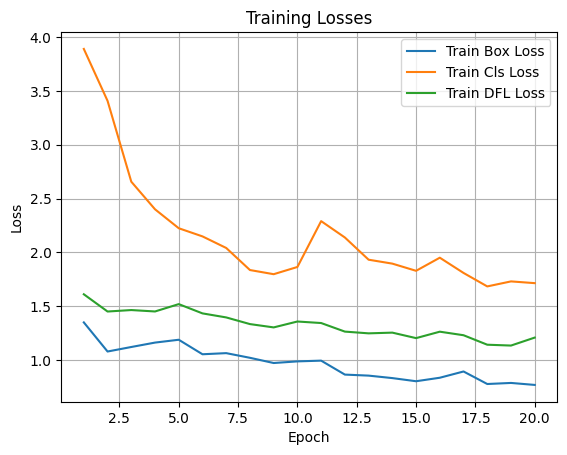

In [2]:
df = pd.read_csv('../runs/baseline/results.csv')

plt.figure()
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
plt.plot(df['epoch'], df['train/cls_loss'], label='Train Cls Loss')
plt.plot(df['epoch'], df['train/dfl_loss'], label='Train DFL Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss')
plt.title('Training Losses')
plt.legend(); plt.grid(True)
plt.show()

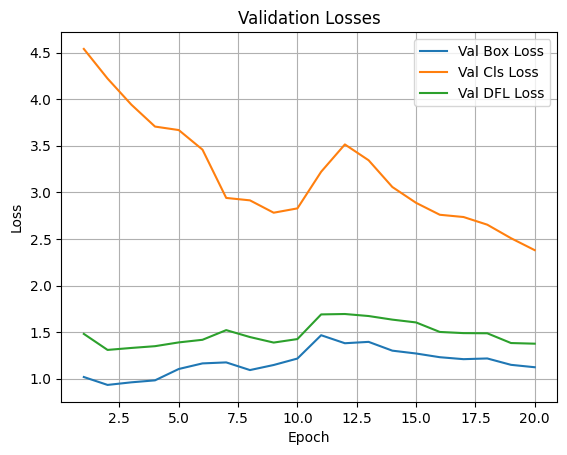

In [3]:
plt.figure()
plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss')
plt.plot(df['epoch'], df['val/cls_loss'], label='Val Cls Loss')
plt.plot(df['epoch'], df['val/dfl_loss'], label='Val DFL Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss')
plt.title('Validation Losses')
plt.legend(); plt.grid(True)
plt.show()

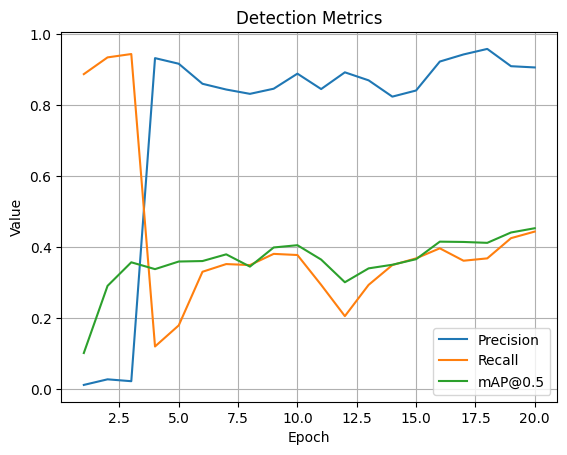

In [4]:
plt.figure()
plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision')
plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall')
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@0.5')
plt.xlabel('Epoch'); plt.ylabel('Value')
plt.title('Detection Metrics')
plt.legend(); plt.grid(True)
plt.show()